# Diabetes Prediction using Decision Trees

This Python script aims to predict diabetes based on a provided dataset using a Decision Tree classifier. The code includes data loading, exploration, visualization, preprocessing, model training, and evaluation.

## Dataset:

The dataset used for this analysis is named "diabetes.csv." It contains information related to diabetes, and the target variable is "Outcome" (1 for diabetes, 0 for no diabetes). The dataset includes various features such as glucose level, blood pressure, etc.

### Features:

1. **Pregnancies:** Number of times pregnant
2. **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure:** Diastolic blood pressure (mm Hg)
4. **SkinThickness:** Triceps skinfold thickness (mm)
5. **Insulin:** 2-Hour serum insulin (mu U/ml)
6. **BMI:** Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction:** Diabetes pedigree function
8. **Age:** Age in years

### Target Variable:

- **Outcome:** Presence or absence of diabetes (1 for diabetes, 0 for no diabetes)

## Data Exploration and Visualization:

1. **Pairplot:**
   - A scatter plot matrix for all pairs of features colored by the outcome.

2. **Correlation Heatmap:**
   - A heatmap displaying the correlation between different features.

3. **Countplot:**
   - A bar plot showing the count of instances for each outcome.

4. **Boxplots:**
   - Boxplots for each feature grouped by the outcome.

## Data Preprocessing:

- Standardization:
  - Features are standardized using `StandardScaler` to ensure consistent scales for the Decision Tree model.

## Decision Tree Model:

### Hyperparameters:

1. **max_depth:**
   - Maximum depth of the tree.
   
2. **criterion:**
   - Function to measure the quality of a split ('gini' or 'entropy').

3. **splitter:**
   - Strategy to choose the split at each node ('best' or 'random').

### Workflow:

1. **Initialization:**
   - The Decision Tree classifier is initialized with a maximum depth of 3, 'gini' criterion, and 'best' splitter.

2. **Cross-Validation:**
   - 5-fold cross-validation is performed, and the mean accuracy is calculated.

3. **Model Training:**
   - The Decision Tree model is trained on the entire training set.

4. **Model Evaluation:**
   - Training and testing accuracy scores are calculated.
   - Classification report is printed, including precision, recall, and F1-score.
   - Confusion matrix is visualized.

5. **Hyperparameter Tuning:**
   - GridSearchCV is employed to find the best hyperparameters (max_depth, criterion, splitter) for the Decision Tree.

6. **Final Model Evaluation:**
   - The model is evaluated on the test set using the best hyperparameters.
   - Accuracy score and classification report are printed.




In [9]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
#import data
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
# Split the data into X (features) and y (target variable)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

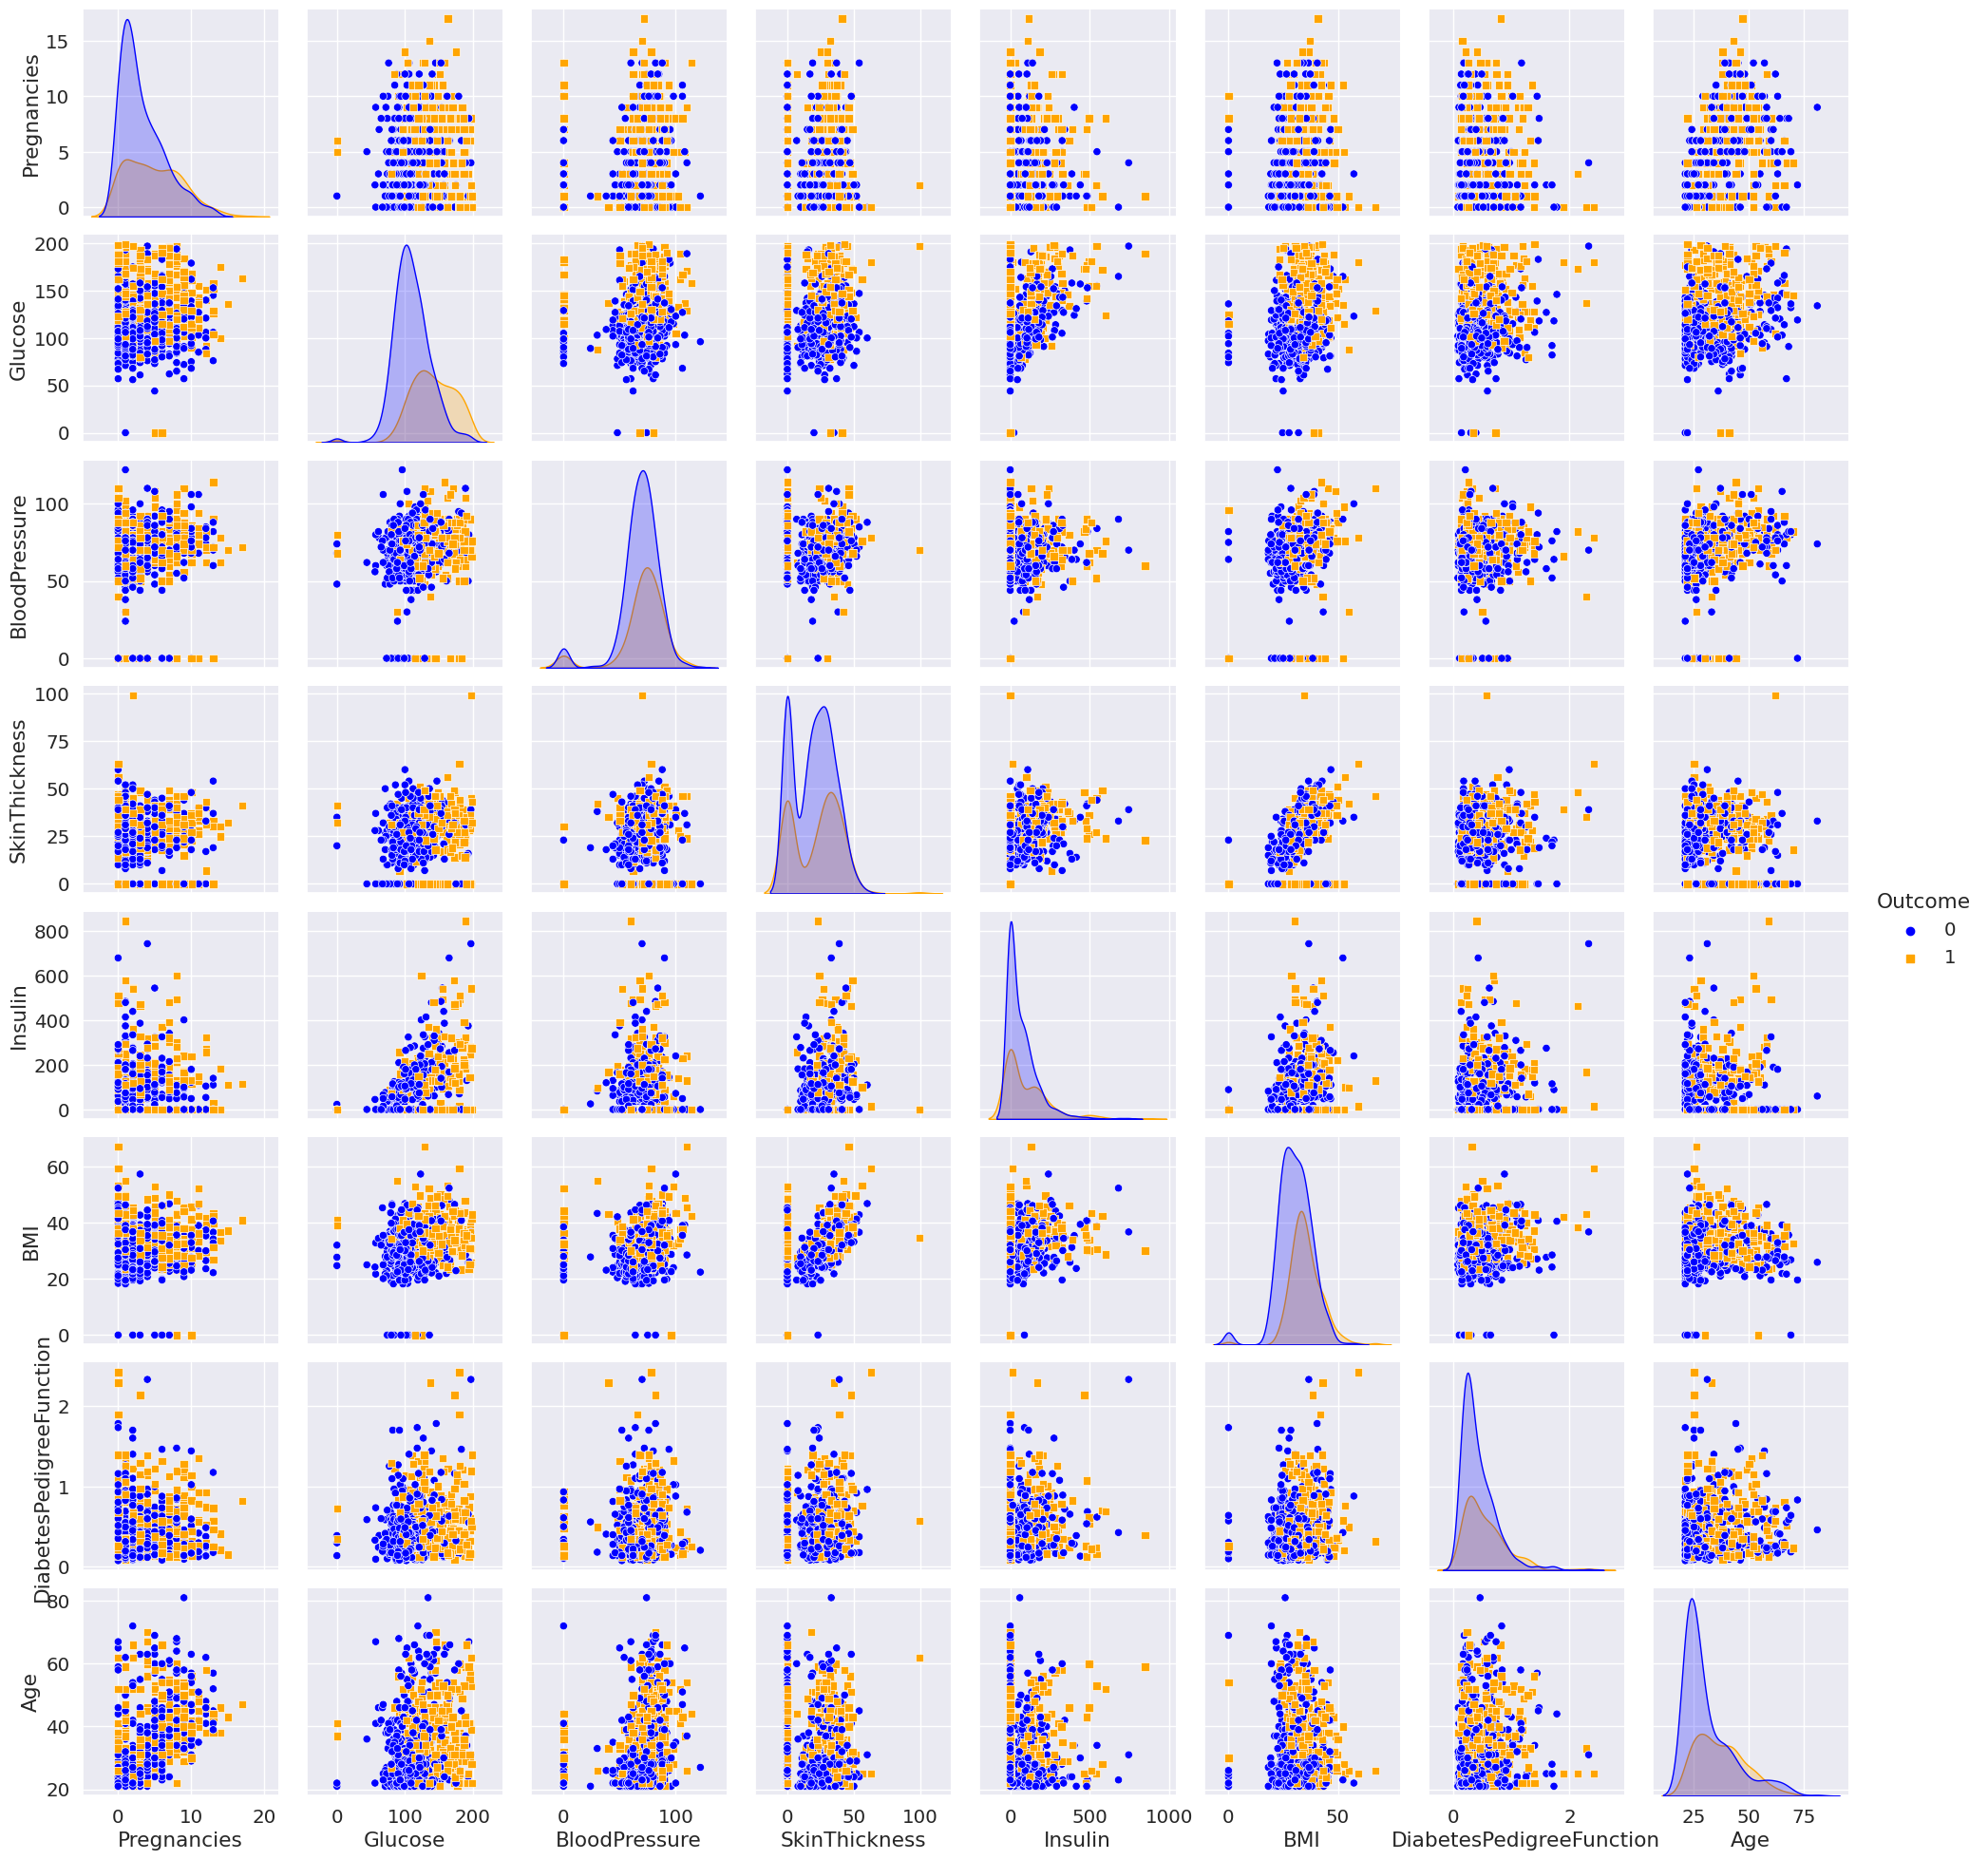

In [11]:
# Use a pairplot to create scatter plots for all pairs of features
sns.pairplot(df, hue='Outcome', markers=['o', 's'], palette={0: 'blue', 1: 'orange'})
plt.show()

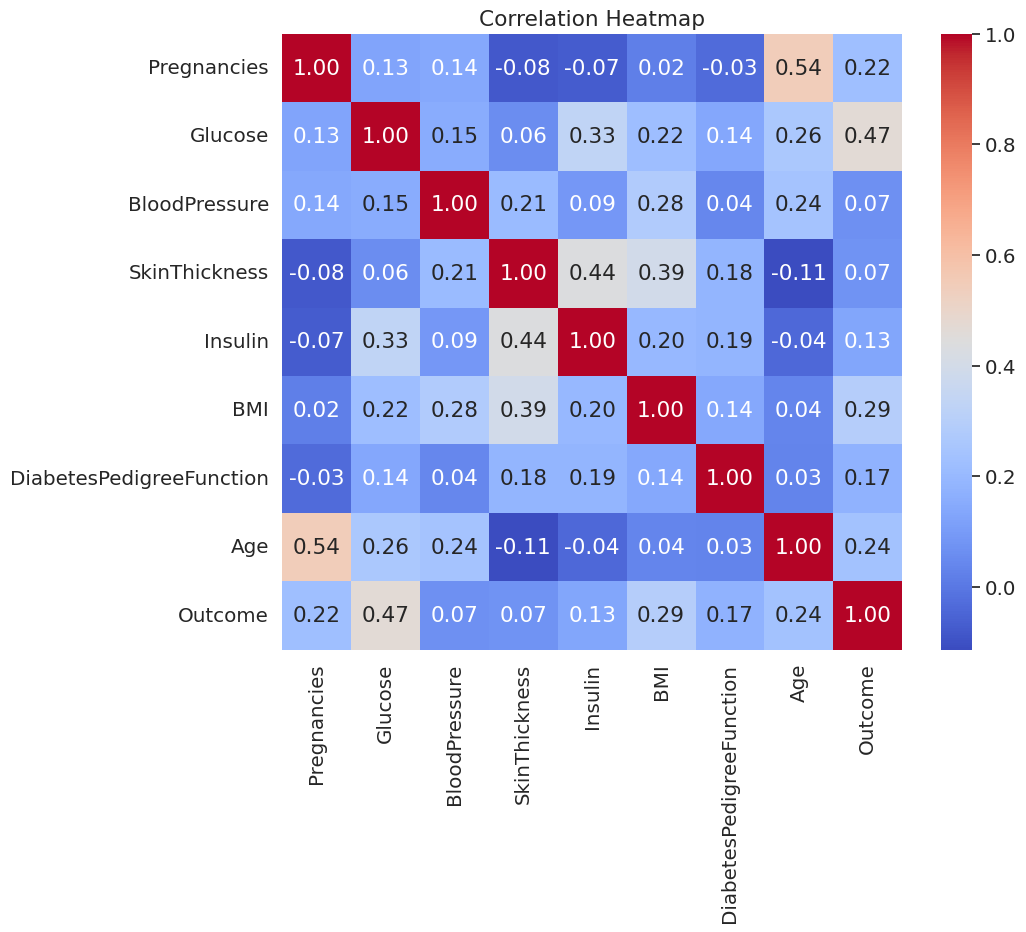

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

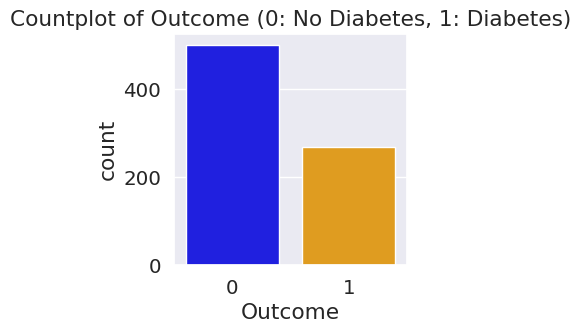

In [19]:
# Countplot of the target variable
plt.figure(figsize=(3, 3))
sns.countplot(x='Outcome', data=df, palette={0: 'blue', 1: 'orange'})
plt.title("Countplot of Outcome (0: No Diabetes, 1: Diabetes)")
plt.show()

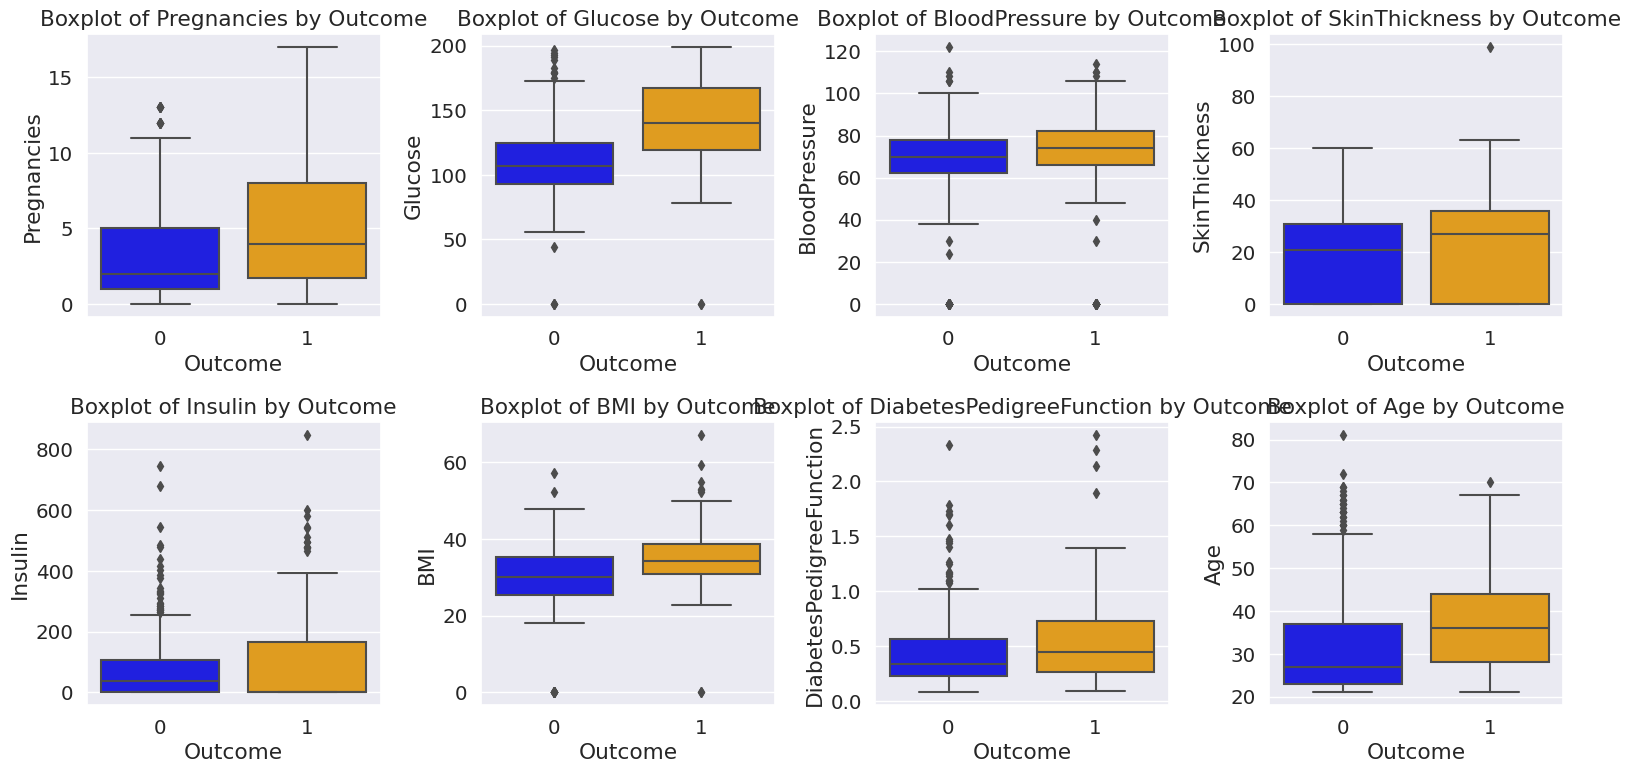

In [20]:
# Boxplot for each feature by Outcome
plt.figure(figsize=(16, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='Outcome', y=column, data=df, palette={0: 'blue', 1: 'orange'})
    plt.title(f"Boxplot of {column} by Outcome")
plt.tight_layout()
plt.show()

In [5]:
# create Decision Tree model
dt = DecisionTreeClassifier(max_depth=3, criterion='gini', splitter='best')

# perform 5-fold cross-validation and calculate mean accuracy
cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
mean_cv_score = cv_scores.mean()

# train the Decision Tree model on the entire training set
dt.fit(X_train, y_train)

# print mean cross-validation accuracy and accuracy score
print(f'Mean CV Accuracy: {mean_cv_score:.2f}')

Mean CV Accuracy: 0.76


In [6]:
# Evaluate the model on the training set
y_train_pred = dt.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)

# Evaluate the model on the testing set
y_test_pred = dt.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print(f"Training accuracy: {train_acc:.3f}")
print(f"Testing accuracy: {test_acc:.3f}")

# Print the classification report
print(classification_report(y_test, y_test_pred))

Training accuracy: 0.777
Testing accuracy: 0.760
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



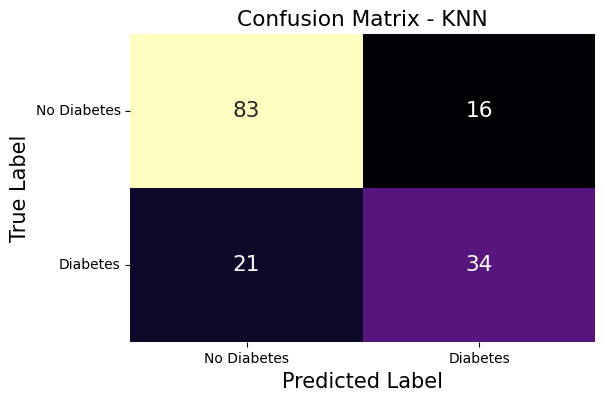

In [7]:
# Plot confusion matrix
# Import metrics from sklearn
from sklearn import metrics
# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Plot confusion matrix
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma",
            cbar = False)
ax.set_title("Confusion Matrix - KNN")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["No Diabetes", "Diabetes"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["No Diabetes", "Diabetes"], rotation=0)
plt.show()

In [10]:
# define parameter grid
param_grid = {'max_depth': [2, 3, 4, 5],
              'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random']}

# create Decision Tree model
dt = DecisionTreeClassifier()

# create GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# fit the grid search object to the data
grid_search.fit(X_train, y_train)

# extract the best estimator and its score
best_dt = grid_search.best_estimator_
best_score = grid_search.best_score_

# predict class labels for test set using the best estimator
y_pred = best_dt.predict(X_test)

# print accuracy score and classification report
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7662337662337663
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



#Conclusion

The model achieved an overall accuracy of 76.62%. It shows good precision (81%) for predicting individuals without diabetes but lower precision (69%) for those with diabetes. The model correctly identifies 84% of non-diabetic individuals (recall) but captures only 64% of diabetic cases. The F1-score is 82% for non-diabetic and 66% for diabetic cases. The macro and weighted averages for precision, recall, and F1-score are around 0.75 and 0.76, respectively. There's potential for improvement, particularly in increasing recall for individuals with diabetes.